## Problem Set 2

Ruoyun Tan

First, import all the needed library.

In [202]:
import sympy as sy
import numpy as np
import math
import time
import random
import scipy.integrate
import scipy.stats
from matplotlib import pyplot as plt
from autograd import numpy as anp
from autograd import grad

### Part 1

#### Problem 1

First, define function f and take its derivative using Sympy, then lambdify it.

In [203]:
# define f
x = sy.symbols("x")
f = (sy.sin(x) + 1)**(sy.sin(sy.cos(x)))
#calculate the derivative using Sympy and lambdify the functions
f_der = sy.lambdify(x, sy.diff(f, x), "numpy")
f = sy.lambdify(x, f, "numpy")

To check the results, plot f and its deriavtive on $[-\pi. \pi]$.

Text(0.5, 1.0, 'f and its derivative')

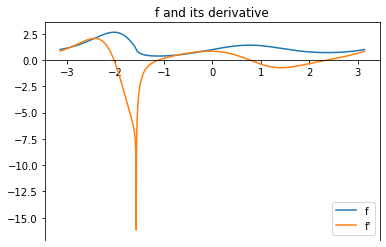

In [204]:
ax = plt.gca()
ax.spines["bottom"].set_position("zero")
#take points on [\pi, \pi] to plot
t = np.linspace(-math.pi, math.pi, 10000)
ax.plot(t, f(t), label="f")
ax.plot(t, f_der(t), label="f'")
ax.legend(loc="lower right")
plt.title("f and its derivative")

From the plot, we can see that on $[-\pi, \pi]$, the derivative cross the x-axis at 4 points. Each of these points correspond to a local minimum/maximum of $f$.

#### Problem 2

For each of the finite difference quotients, write a function.

In [205]:
def forward1(f0, x0, h):
    '''
    Inputs: 
        f0: a function handle
        x0: an array of points x
        h: a float
    
    Return:
        an array of difference quotients evaluated at each point in x0
    '''
    
    return (f0(x0 + h) - f0(x0)) / h

def forward2(f0, x0, h):
    '''
    Inputs: 
        f0: a function handle
        x0: an array of points x
        h: a float
    
    Return:
        an array of difference quotients evaluated at each point in x0
    '''
    
    return (- 3 * f0(x0) + 4 * f0(x0 + h) - f0(x0 + 2 * h)) / (2 * h)

def backward1(f0, x0, h):
    '''
    Inputs: 
        f0: a function handle
        x0: an array of points x
        h: a float
    
    Return:
        an array of difference quotients evaluated at each point in x0
    '''
    
    return (f0(x0) - f0(x0 - h)) / h

def backward2(f0, x0, h):
    '''
    Inputs: 
        f0: a function handle
        x0: an array of points x
        h: a float
    
    Return:
        an array of difference quotients evaluated at each point in x0
    '''
    
    return (3 * f0(x0) - 4 * f0(x0 - h) + f0(x0 - 2 * h)) / (2 * h)

def centered2(f0, x0, h):
    '''
    Inputs: 
        f0: a function handle
        x0: an array of points x
        h: a float
    
    Return:
        an array of difference quotients evaluated at each point in x0
    '''
    
    return (f0(x0 + h) - f0(x0 - h)) / (2 * h)

def centered4(f0, x0, h):
    '''
    Inputs: 
        f0: a function handle
        x0: an array of points x
        h: a float
    
    Return:
        an array of difference quotients evaluated at each point in x0
    '''
    
    return (f0(x0 - 2 * h) - 8 * f0(x0 - h) + 8 * f0(x0 + h) - f0(x0 + 2 * h)) / (12 * h)

Next, plot each of these functions and the derivative obatined using Sympy from problem 1 on the domain of $[-\pi, \pi]$.

Text(0.5, 1.0, 'Order 1 Forward Approximation of Derivative')

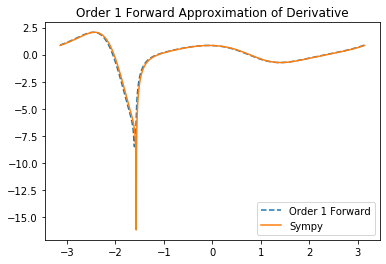

In [206]:
#Again, take points on [\pi, \pi] to plot
t = np.linspace(-math.pi, math.pi, 10000)

plt.plot(t, forward1(f, t, 0.05), "--", label="Order 1 Forward")
plt.plot(t, f_der(t), label="Sympy")
plt.legend(loc="lower right")
plt.title("Order 1 Forward Approximation of Derivative")

Text(0.5, 1.0, 'Order 2 Forward Approximation of Derivative')

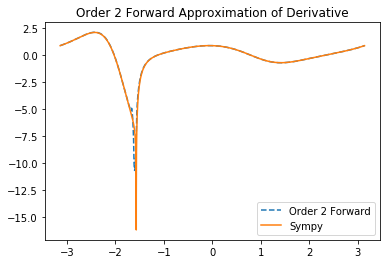

In [207]:
plt.plot(t, forward2(f, t, 0.05), "--", label="Order 2 Forward")
plt.plot(t, f_der(t), label="Sympy")
plt.legend(loc="lower right")
plt.title("Order 2 Forward Approximation of Derivative")

Text(0.5, 1.0, 'Order 1 Backward Approximation of Derivative')

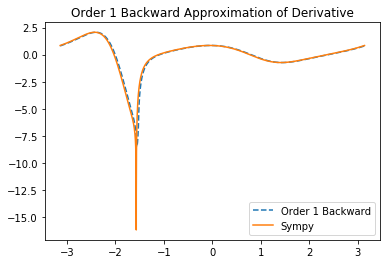

In [208]:
plt.plot(t, backward1(f, t, 0.05), "--", label="Order 1 Backward")
plt.plot(t, f_der(t), label="Sympy")
plt.legend(loc="lower right")
plt.title("Order 1 Backward Approximation of Derivative")

Text(0.5, 1.0, 'Order 2 Backward Approximation of Derivative')

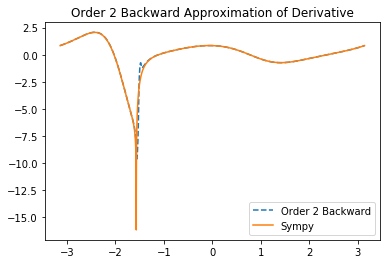

In [209]:
plt.plot(t, backward2(f, t, 0.05), "--", label="Order 2 Backward")
plt.plot(t, f_der(t), label="Sympy")
plt.legend(loc="lower right")
plt.title("Order 2 Backward Approximation of Derivative")

Text(0.5, 1.0, 'Order 2 Centered Approximation of Derivative')

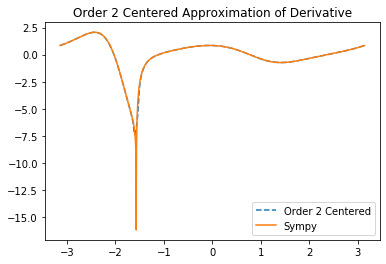

In [210]:
plt.plot(t, centered2(f, t, 0.05), "--", label="Order 2 Centered")
plt.plot(t, f_der(t), label="Sympy")
plt.legend(loc="lower right")
plt.title("Order 2 Centered Approximation of Derivative")

Text(0.5, 1.0, 'Order 4 Centered Approximation of Derivative')

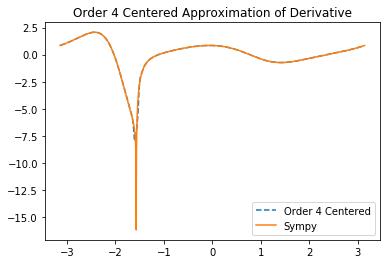

In [211]:
plt.plot(t, centered4(f, t, 0.05), "--", label="Order 4 Centered")
plt.plot(t, f_der(t), label="Sympy")
plt.legend(loc="lower right")
plt.title("Order 4 Centered Approximation of Derivative")

From the graphs, we can see that the approximations are quite close to the actual derivative obtained from Sympy. 

#### Problem 3

First, I write functions that compute the absolute error of approximation at one point for each of the finite different quotients.

In [212]:
def abs_error_forward1(x0, h):
    '''
    Inputs:
        x0: a number
        h: a float
        
    Return:
        absolute value of the error
    '''
    
    return abs(f_der(x0) - forward1(f, x0, h))


def abs_error_forward2(x0, h):
    '''
    Inputs:
        x0: a number
        h: a float
        
    Return:
        absolute value of the error
    '''
    
    return abs(f_der(x0) - forward2(f, x0, h))


def abs_error_backward1(x0, h):
    '''
    Inputs:
        x0: a number
        h: a float
        
    Return:
        absolute value of the error
    '''
    return abs(f_der(x0) - backward1(f, x0, h))


def abs_error_backward2(x0, h):
    '''
    Inputs:
        x0: a number
        h: a float
        
    Return:
        absolute value of the error
    '''
    return abs(f_der(x0) - backward2(f, x0, h))


def abs_error_centered2(x0, h):
    '''
    Inputs:
        x0: a number
        h: a float
        
    Return:
        absolute value of the error
    '''
    return abs(f_der(x0) - centered2(f, x0, h))


def abs_error_centered4(x0, h):
    '''
    Inputs:
        x0: a number
        h: a float
        
    Return:
        absolute value of the error
    '''
    return abs(f_der(x0) - centered4(f, x0, h))

Next, I plot the absolute error against h.

Text(0.5, 1.0, 'Absolute Error of Difference Quotients Approximation')

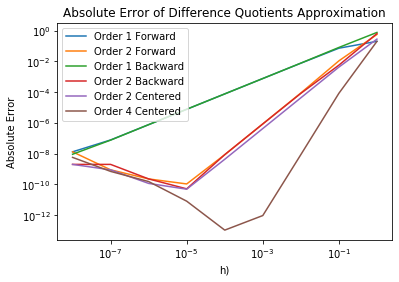

In [213]:
h = np.logspace(-8, 0, 9)

plt.plot(h, abs_error_forward1(1, h), label="Order 1 Forward")
plt.plot(h, abs_error_forward2(1, h), label="Order 2 Forward")
plt.plot(h, abs_error_backward1(1, h), label="Order 1 Backward")
plt.plot(h, abs_error_backward2(1, h), label="Order 2 Backward")
plt.plot(h, abs_error_centered2(1, h), label="Order 2 Centered")
plt.plot(h, abs_error_centered4(1, h), label="Order 4 Centered")
plt.legend(loc="upper left")
plt.yscale('log')
plt.xscale('log')
plt.xlabel("h)")
plt.ylabel("Absolute Error")
plt.title("Absolute Error of Difference Quotients Approximation")

#### Problem 4

In [218]:
#load the data from plane.npy
data = np.load("plane.npy")
#convert degrees to radian
data[:, 1:] = np.deg2rad(data[:, 1:])
a = 500
x_t = a * np.tan(data[:, 2]) / (np.tan(data[:, 2]) - np.tan(data[:, 1]))
y_t = a * np.tan(data[:, 2]) * np.tan(data[:, 1]) / (np.tan(data[:, 2]) - np.tan(data[:, 1]))

#compute the x'(t)
x_t_der = np.full_like(x_t, 0)
x_t_der[0] = x_t[1] - x_t[0]
x_t_der[1: 7] = (x_t[2: 8] - x_t[0: 6]) / 2
x_t_der[7] = x_t[7] - x_t[6]

#compute the y'(t)
y_t_der = np.full_like(y_t, 0)
y_t_der[0] = y_t[1] - y_t[0]
y_t_der[1: 7] = (y_t[2: 8] - y_t[0: 6]) / 2
y_t_der[7] = y_t[7] - y_t[6]

#compute the speed
speeds = np.sqrt(x_t_der**2 + y_t_der**2)

print(speeds)

[46.42420062 47.00103938 48.99880514 50.09944163 48.29035084 51.56455905
 53.92303355 51.51480057]


#### Problem 5

First, I write a function that computes the jacobian of a function.

In [219]:
def jacob(f0, x0, h):
    '''
    Inputs:
        f0: a function
        x0: a point
        h: a float
    
    Return:
        a numpy array of the jacobian
    '''
    
    ders = []
    for i in range(len(x0)):
        e = np.zeros(len(x0))
        e[i] = 1
        der = (f0(x0 + h * e) - f0(x0 - h * e))/ (2 * h)
        ders.append(der)
    ders = np.asarray(ders)
    ders = np.transpose(ders)
    
    return ders 

In [220]:
#write a test function
def func(x):
    return np.asarray([x[0]**2, x[0]**3 - x[1]])

For this function, we can calculate the jacobian easily:
$$
 J = \left[
 \begin{matrix}
   2x & 0\\
   3x^2 & -1 
  \end{matrix}
  \right] 
$$
At the point (1, 2), for example, the Jacobian should be
$$
 J = \left[
 \begin{matrix}
   2 & 0\\
   3 & -1 
  \end{matrix}
  \right] 
$$

In [221]:
x = np.array([1, 2])
jacob(func, x, 0.01)

array([[ 2.    ,  0.    ],
       [ 3.0001, -1.    ]])

So the function jacob() get the right results.

#### Problem 7

In [222]:
#define f and its derivative using Sympy
x = sy.symbols("x")
f = (sy.sin(x) + 1)**(sy.sin(sy.cos(x)))
f_der = sy.lambdify(x, sy.diff(f, x), "numpy")
f = sy.lambdify(x, f, "numpy")

In [223]:
#write a function that reports the performance (time needed and error) of three ways of computing derivatives
def efficiency(N):
    '''
    Input:
        N: an integer. The experiment will be conducted N times.
        
    Returns:
        sympy_times: computation times of Sympy
        sympy_errs: computation error of Sympy (set to 1e-18)
        dq_times: computation times of difference quotients
        dq_errs: computation error of difference quotients 
        grad_times: computation times of Autograd
        grad_errs: computation error of Autograd
    '''
    sympy_errs = [1e-18] * N
    sympy_times = []
    dq_errs = []
    dq_times = []
    grad_errs = []
    grad_times = []
    for i in range(N):
        x0 = random.uniform(-100, 100)
        start_time_sympy = time.time()
        x = sy.symbols("x")
        f = (sy.sin(x) + 1)**(sy.sin(sy.cos(x)))
        f_der = sy.lambdify(x, sy.diff(f, x), "numpy")
        der_sympy = f_der(x0)
        sympy_times.append(time.time() - start_time_sympy)
        start_time_dq = time.time()
        dq_errs.append(abs_error_centered4(x0, 0.0001))
        dq_times.append(time.time() - start_time_dq)
        f = lambda x: (anp.sin(x) + 1)**(anp.sin(anp.cos(x)))
        start_time_grad = time.time()
        der_grad = grad(f)
        grad_errs.append(abs(f_der(x0) - der_grad(x0)))
        grad_times.append(time.time() - start_time_grad)
    
    return sympy_times, sympy_errs, dq_times, dq_errs, grad_times, grad_errs

Text(0.5, 1.0, 'Comparing the efficiency of three ways for computing derivatives')

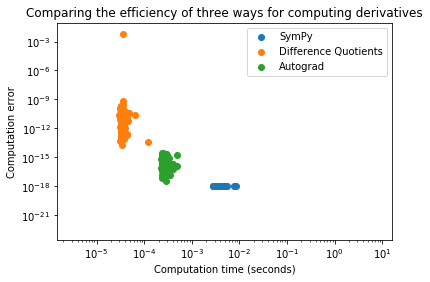

In [225]:
N = 200

plt.yscale('log')
plt.xscale('log')
plt.xlabel("Computation time (seconds)")
plt.ylabel("Computation error")
plt.scatter(efficiency(N)[0], efficiency(N)[1], label="SymPy")
plt.scatter(efficiency(N)[2], efficiency(N)[3], label="Difference Quotients")
plt.scatter(efficiency(N)[4], efficiency(N)[5], label="Autograd")
plt.legend(loc="upper right")
plt.title("Comparing the efficiency of three ways for computing derivatives")

From the graph, we can see that Sympy has runs the slowest but produces the most accurate results. Using difference quotients is the fastest way compared to Autograd and Sympy but its results are the least accurate compared with the other methods.

### Part 2

#### Exercise 2.1

In [226]:
'''
For the functions below, the inputs are:
    g: a function to evaluate
    a: lower integration bound
    b: upper integration bound
    N: number of intervals
'''

#write three helper functions to approximate the integral with the three Newton-Cotes methods
def midpoint(g, a, b, N):
    bin_width = (b - a) / N
    midpoint_int = 0
    for i in range(N):
        x = a + (2 * i + 1) * (b - a)/ (2 * N)
        midpoint_int += g(x) * bin_width
    
    return midpoint_int

def trapezoid(g, a, b, N):
    bin_width = (b - a) / N
    trapezoid_int = g(a) + g(b)
    for i in range(1, N):
        xi = a + i  * bin_width
        trapezoid_int += 2 * g(xi)
    trapezoid_int = trapezoid_int * bin_width / 2 
    
    return trapezoid_int

def simpsons(g, a, b, N):
    bin_width = (b - a) / (2 * N)
    simpsons_int = g(a) + g(b)
    
    for i in range(1, 2 * N, 2):
        xi = a + bin_width  * i 
        simpsons_int += g(xi) * 4
    for i in range(2, (2 * N - 1), 2):
        xi = a + bin_width * i
        simpsons_int += g(xi) * 2
    
    simpsons_int = simpsons_int * bin_width / 3
    
    return simpsons_int

#a function that returns the value of integral approximated with the input methods 
def NCIntegration(g, a, b, N, method={'midpoint', 'trapezoid', 'Simpsons'}):
    values = dict()
    if "midpoint" in method:
        values["midpoint"] = midpoint(g, a, b, N)
    if "trapezoid" in method:
        values["trapezoid"] = trapezoid(g, a, b, N)
    if "Simpsons" in method:
        values["Simpsons"] = simpsons(g, a, b, N)
    
    return values

In [227]:
#define the function that we want to evaluate
g = lambda x: 0.1 * (x**4) - 1.5 * (x**3) + 0.53  * (x**2) + 2 * x + 1
#evaluate the function using all three methods
NCIntegration(g, -10, 10, 1000000, method={'midpoint', 'trapezoid', 'Simpsons'})

{'midpoint': 4373.333333320144,
 'trapezoid': 4373.333333360538,
 'Simpsons': 4373.333333333232}

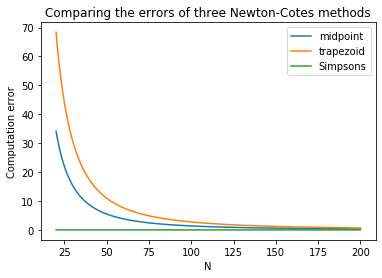

In [228]:
#plot the errors for different values of N
Nvec = np.arange(20, 201, 1)

def plot_NC_err(g, a, b, Nvec):
    true_value = scipy.integrate.quad(g, a, b)[0]
    midpoint_errs = []
    trapezoid_errs = []
    simpsons_errs = []
    for N in Nvec:
        midpoint_errs.append(abs(NCIntegration(g, a, b, N)["midpoint"] - true_value))
        trapezoid_errs.append(abs(NCIntegration(g, a, b, N)["trapezoid"] - true_value))
        simpsons_errs.append(abs(NCIntegration(g, a, b, N)["Simpsons"] - true_value))
    plt.xlabel("N")
    plt.ylabel("Computation error")
    plt.plot(Nvec, midpoint_errs, label="midpoint")
    plt.plot(Nvec, trapezoid_errs, label="trapezoid")
    plt.plot(Nvec, simpsons_errs, label="Simpsons")
    plt.legend(loc="upper right")
    plt.title("Comparing the errors of three Newton-Cotes methods")
    
plot_NC_err(g, -10, 10, Nvec)

From the graph, we can see that when N is small, the three methods performs differently and the simpsons method produces the most accurate results. When N gets large, these three methods all produces very small errors.

Text(0.5, 1.0, 'g(x) on [-10, 10]')

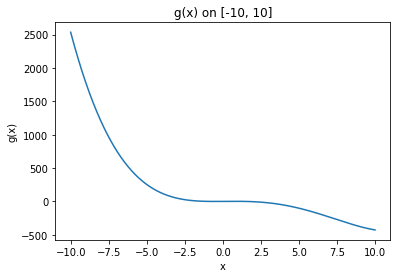

In [229]:
x = np.linspace(-10, 10, 10000)

plt.plot(x, g(x))
plt.xlabel("x")
plt.ylabel("g(x)")
plt.title("g(x) on [-10, 10]")

Plotting $g(x)$ on $[-10, 10]$, we can see that the slope changes multiple times on the curve. So when N is small, the trapezoid method would produce relatively large error. Its shape resembles the shape of a quadratic function, so the Simpsons method would produce relatively small error.

#### Exercise 2.2

In [230]:
#write a function to approximate a normal distribution
def NCNormal(mu, sigma, N, k):
    '''
    Inputs:
        mu: mean
        sigma: standard deviation
        N: the number of equally spaced nodes
        k: he number of standard deviations k away from mu to make the furthest nodes on either side of mu
    
    Returns:
         nodes and weights
    '''
    z1 = mu - sigma * k
    zN = mu + sigma * k
    z = np.linspace(z1, zN, N)
    w = []
    for i in range(N):
        if i == 0:
            w.append(scipy.stats.norm.cdf((z[i] + z[i+1]) / 2, loc=mu, scale=sigma))
        elif i > 0 and i < (N - 1):
            w.append(scipy.stats.norm.cdf((z[i] + z[i+1]) / 2, loc=mu, scale=sigma) - scipy.stats.norm.cdf((z[i-1] + z[i]) / 2, loc=mu, scale=sigma))
        else:
            w.append(1 - scipy.stats.norm.cdf((z[i-1] + z[i]) / 2, loc=mu, scale=sigma))
            
    return z, w

When N = 11, mu = 5, sigma = 1.5, k = 3, the nodes are  [0.5 1.4 2.3 3.2 4.1 5.  5.9 6.8 7.7 8.6 9.5] ; and the respective weights are [0.0034669738030406686, 0.014397446759775874, 0.04894278070604153, 0.1172529240779014, 0.19802845246428785, 0.23582284437790535, 0.1980284524642878, 0.11725292407790144, 0.04894278070604152, 0.014397446759775945, 0.0034669738030406183]


Text(0.5, 1.0, 'Approximation of a normal distribution (N = 11, mu = 5, sigma = 1.5, k = 3)')

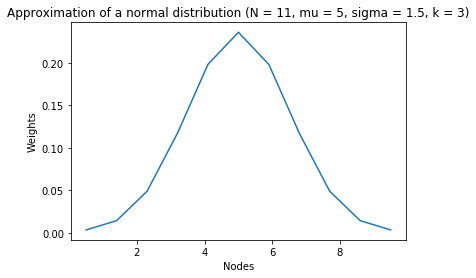

In [231]:
N = 11
mu = 5
sigma = 1.5
k = 3
print("When N = 11, mu = 5, sigma = 1.5, k = 3, the nodes are ", NCNormal(mu, sigma, N, k)[0], "; and the respective weights are",  NCNormal(mu, sigma, N, k)[1])

plt.xlabel("Nodes")
plt.ylabel("Weights")
plt.plot(NCNormal(mu, sigma, N, k)[0], NCNormal(mu, sigma, N, k)[1])
plt.title("Approximation of a normal distribution (N = 11, mu = 5, sigma = 1.5, k = 3)")

#### Exercise 2.3

In [232]:
def NCLognormal(mu, sigma, N, k):
    a1 = mu - sigma * k
    aN = mu + sigma * k
    a = np.linspace(a1, aN, N)
    a = np.exp(a)
    w = []
    for i in range(N):
        if i == 0:
            w.append(scipy.stats.lognorm.cdf((a[i] + a[i+1]) / 2, sigma, loc=mu, scale=np.exp(mu)))
        elif i > 0 and i < (N - 1):
            w.append(scipy.stats.lognorm.cdf((a[i] + a[i+1]) / 2, sigma, loc=mu, scale=np.exp(mu)) \
                     - scipy.stats.lognorm.cdf((a[i-1] + a[i]) / 2, sigma, loc=mu, scale=np.exp(mu)))
        else:
            w.append(1 - (scipy.stats.lognorm.cdf((a[i-1] + a[i]) / 2, sigma, loc=mu, scale=np.exp(mu))))
    
    return a, w

When N = 11, mu = 5, sigma = 1.5, k = 3, the nodes are  [1.64872127e+00 4.05519997e+00 9.97418245e+00 2.45325302e+01
 6.03402876e+01 1.48413159e+02 3.65037468e+02 8.97847292e+02
 2.20834799e+03 5.43165959e+03 1.33597268e+04] ; and the respective weights are [0.0, 0.002076134809680094, 0.046100095856152955, 0.13107103603251036, 0.2153379303190513, 0.24308027998497428, 0.19381644403012965, 0.10951389811478884, 0.043789826508775054, 0.012368065605801504, 0.0028462887381359714]


Text(0.5, 1.0, 'Approximation of a log normal distribution (N = 11, mu = 5, sigma = 1.5, k = 3)')

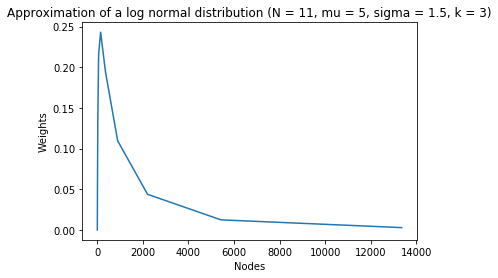

In [233]:
N = 11
mu = 5
sigma = 1.5
k = 3
print("When N = 11, mu = 5, sigma = 1.5, k = 3, the nodes are ", NCLognormal(mu, sigma, N, k)[0], "; and the respective weights are",  NCLognormal(mu, sigma, N, k)[1])
plt.plot(NCLognormal(mu, sigma, N, k)[0], NCLognormal(mu, sigma, N, k)[1])
plt.xlabel("Nodes")
plt.ylabel("Weights")
plt.title("Approximation of a log normal distribution (N = 11, mu = 5, sigma = 1.5, k = 3)")

If we set N to be larger, say N = 1000, we would obtain a curve that shapes like an actual log-normal distribution curve.

Text(0.5, 1.0, 'Approximation of a log normal distribution (N = 1000)')

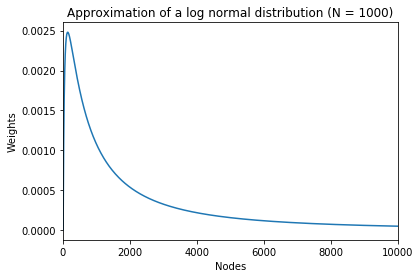

In [234]:
N = 1000
mu = 5
sigma = 1.5
k = 3
plt.xlim(0, 10000)
plt.plot(NCLognormal(mu, sigma, N, k)[0], NCLognormal(mu, sigma, N, k)[1])
plt.xlabel("Nodes")
plt.ylabel("Weights")
plt.title("Approximation of a log normal distribution (N = 1000)")

#### Exercise 2.4

In [235]:
N = 1000
mu = 10.5
sigma = 0.8
k = 10
nodes = np.asarray(NCLognormal(mu, sigma, N, k)[0])
weights = np.asarray(NCLognormal(mu, sigma, N, k)[1])
#approximate the expected income as sum of nodes * weights
appr_e = np.sum(nodes * weights)
print("The approximated expected income is ", appr_e)
print("The exact value of expected income is ", np.exp(10.5 + 0.8 ** 2 / 2))

The approximated expected income is  50020.517771299375
The exact value of expected income is  50011.087008521754


#### Exercise 3.1

In [236]:
#define g
g = lambda x: 0.1 * (x**4) - 1.5 * (x**3) + 0.53  * (x**2) + 2 * x + 1

In [237]:
a = -10
b = 10

#define a function that solves the system of equations when N = 3
def solve_equations(x):
    return [x[0] + x[1] + x[2] - scipy.integrate.quad(lambda x: 1, a, b)[0], 
            x[0] * x[3] + x[1] * x[4] + x[2] * x[5] - scipy.integrate.quad(lambda x: x, a, b)[0],
            x[0] * (x[3] ** 2) + x[1] * (x[4] ** 2) + x[2] * (x[5] ** 2) - scipy.integrate.quad(lambda x: x ** 2, a, b)[0],
            x[0] * (x[3] ** 3) + x[1] * (x[4] ** 3) + x[2] * (x[5] ** 3) - scipy.integrate.quad(lambda x: x ** 3, a, b)[0],
            x[0] * (x[3] ** 4) + x[1] * (x[4] ** 4) + x[2] * (x[5] ** 4)  - scipy.integrate.quad(lambda x: x ** 4, a, b)[0],
            x[0] * (x[3] ** 5) + x[1] * (x[4] ** 5) + x[2] * (x[5] ** 5)  - scipy.integrate.quad(lambda x: x ** 5, a, b)[0]]

#randomly generate guesses until we obtain the right solution
guess = np.random.rand(6)
while not scipy.optimize.root(solve_equations, guess).success:
    guess = np.random.rand(6)

sol = scipy.optimize.root(solve_equations, guess).x
weights = np.asarray(sol[:3])
gvalues = np.asarray(g(sol[3:]))
appr_int = np.sum(weights * gvalues)

print("The approximated value using Gaussian quadrature is", appr_int)
print("The approximated value using midpoint rule is", midpoint(g, a, b, 3))
print("The approximated value using trapezoid rule is", trapezoid(g, a, b, 3))

The approximated value using Gaussian quadrature is 4373.333331853467
The approximated value using midpoint rule is 2967.8189300411505
The approximated value using trapezoid rule is 7283.12757201646


The known analytical value of the integral is 4373.33. We can see that when N is small, Gaussian quadrature gives a much more accurate approximation.

#### Exercise 3.2

In [238]:
g = lambda x: 0.1 * (x**4) - 1.5 * (x**3) + 0.53  * (x**2) + 2 * x + 1

In [239]:
a = -10
b = 10
print("The approximated value using Python Gaussian quadrature command is", scipy.integrate.quad(g, a, b)[0])

The approximated value using Python Gaussian quadrature command is 4373.333333333334


The known analytical value of the integral is 4373.33. We can see that the Python Gaussian quadrature command gives a pretty accurate approximation.

#### Exercise 4.1

In [240]:
#define a function for Standard Monte Carlo integration
def standardMC(g, d, N):
    '''
    Inputs: 
        g: function to be evaluated
        d: domain
        N: the number of random draws
    
    Returns:
        the approximated value of integral
    '''
    np.random.seed(seed=25)
    scale1 = d[0][1] - d[0][0]
    scale2 = d[1][1] - d[1][0]
    V = scale1 * scale2
    x_draws = scipy.stats.uniform.rvs(loc=d[0][0], scale=scale1, size=N)
    y_draws = scipy.stats.uniform.rvs(loc=d[1][0], scale=scale2, size=N)
    nodes = np.asarray([(x_draws[i], y_draws[i]) for i in range(N)])
    mc_int = np.sum(np.apply_along_axis(g, 1, nodes)) * V / N
    
    return mc_int

In [241]:
#define the indicator function
g = lambda x: 1 if x[0]**2 + x[1]**2 <= 1 else 0

In [242]:
#find the smallest N such that the approximated value matches the true value of \pi to the 4th decimal 3.1415

N = 1

while round(standardMC(g, d, N), 4) !=  3.1415:
    N += 1

print("The smallest N is", N)

The smallest N is 1668


#### Exercise 4.2 

In [243]:
#The functions isPrime() and primes_ascend() are from the notebook Numerical Integration by Richard W. Evans
def isPrime(n):
    '''
    --------------------------------------------------------------------
    This function returns a boolean indicating whether an integer n is a
    prime number
    --------------------------------------------------------------------
    INPUTS:
    n = scalar, any scalar value

    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION: None

    OBJECTS CREATED WITHIN FUNCTION:
    i = integer in [2, sqrt(n)]

    FILES CREATED BY THIS FUNCTION: None

    RETURN: boolean
    --------------------------------------------------------------------
    '''
    for i in range(2, int(np.sqrt(n) + 1)):
        if n % i == 0:
            return False

    return True

In [244]:
def primes_ascend(N, min_val=2):
    '''
    --------------------------------------------------------------------
    This function generates an ordered sequence of N consecutive prime
    numbers, the smallest of which is greater than or equal to 1 using
    the Sieve of Eratosthenes algorithm.
    (https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes)
    --------------------------------------------------------------------
    INPUTS:
    N       = integer, number of elements in sequence of consecutive
              prime numbers
    min_val = scalar >= 2, the smallest prime number in the consecutive
              sequence must be greater-than-or-equal-to this value

    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION:
        isPrime()

    OBJECTS CREATED WITHIN FUNCTION:
    primes_vec     = (N,) vector, consecutive prime numbers greater than
                     min_val
    MinIsEven      = boolean, =True if min_val is even, =False otherwise
    MinIsGrtrThn2  = boolean, =True if min_val is
                     greater-than-or-equal-to 2, =False otherwise
    curr_prime_ind = integer >= 0, running count of prime numbers found

    FILES CREATED BY THIS FUNCTION: None

    RETURN: primes_vec
    --------------------------------------------------------------------
    '''
    primes_vec = np.zeros(N, dtype=int)
    MinIsEven = 1 - min_val % 2
    MinIsGrtrThn2 = min_val > 2
    curr_prime_ind = 0
    if not MinIsGrtrThn2:
        i = 2
        curr_prime_ind += 1
        primes_vec[0] = i
    i = min(3, min_val + (MinIsEven * 1))
    while curr_prime_ind < N:
        if isPrime(i):
            curr_prime_ind += 1
            primes_vec[curr_prime_ind - 1] = i
        i += 2

    return primes_vec

In [245]:
#define a function that finds the nth element of a certain type of equidistributed sequence
def find_equidist(n, d, sequence):
    if sequence == "Weyl":
        primes = primes_ascend(d, min_val=2)
        x = n * np.power(primes, 1/2)
        x_frac = x - np.floor(x)                       
        return x_frac
    elif sequence == "Haber":
        primes = primes_ascend(d, min_val=2)
        x = (n * (n + 1) / 2) * np.power(primes, 1/2)
        x_frac = x - np.floor(x)                      
        return x_frac
    elif sequence == "Niederreiter":
        element = []
        for i in range(d):
            x = n * (2 ** ((i + 1)/(d + 1)))
            x_frac = x - int(math.floor(x))                       
            element.append(x_frac)
        return np.asarray(element)
    elif sequence == "Baker":
        element = []
        for i in range(1, d + 1):
            x = n * math.exp(1 / i)
            x_frac = x - int(math.floor(x))
            element.append(x_frac)
        return np.asarray(element)

In [248]:
print("The 1073rd element of the 2-dimensional equidistributed Weyl sequence is", find_equidist(1073, 2, "Weyl"))
print("The 1073rd element of the 2-dimensional equidistributed Haber sequence is", find_equidist(1073, 2, "Haber"))
print("The 1073rd element of the 2-dimensional equidistributed Niederreiter sequence is", find_equidist(1073, 2, "Niederreiter"))
print("The 1073rd element of the 2-dimensional equidistributed Baker sequence is", find_equidist(1073, 2, "Baker"))

The 1073rd element of the 2-dimensional equidistributed Weyl sequence is [0.45115243 0.49051652]
The 1073rd element of the 2-dimensional equidistributed Haber sequence is [0.26885294 0.40737199]
The 1073rd element of the 2-dimensional equidistributed Niederreiter sequence is [0.89528654 0.28132876]
The 1073rd element of the 2-dimensional equidistributed Baker sequence is [0.71640194 0.07792346]


#### Exercise 4.3

In [249]:
def quasiMC(g, d, N, sequence):
    np.random.seed(seed=25)
    scale1 = d[0][1] - d[0][0]
    scale2 = d[1][1] - d[1][0]
    V = scale1 * scale2
    nodes = []
    for n in range(1, N+1):
        point = find_equidist(n, len(d), sequence)
        node = [d[0][0] + scale1 * point[0], d[1][0] + scale2 * point[1]]
        nodes.append(node)
    nodes = np.asarray(nodes)
    mc_int = np.sum(np.apply_along_axis(g, 1, nodes)) * V / N
    
    return mc_int

In [250]:
#define g
g = lambda x: 1 if x[0]**2 + x[1]**2 <= 1 else 0

In [251]:
#find the smallest N such that the approximated value using Weyl sequence matches the true value of \pi to the 4th decimal 3.1415
N = 1

while round(quasiMC(g, d, N, "Weyl"), 4) !=  3.1415:
    N += 1

print("The smallest N using Weyl sequence to obtain 3.1415 is", N)

The smallest N using Weyl sequence to obtain 3.1415 is 1244


In [168]:
#find the smallest N such that the approximated value using Haber sequence matches the true value of \pi to the 4th decimal 3.1415
N = 1

while round(quasiMC(g, d, N, "Haber"), 4) !=  3.1415:
    N += 1

print("The smallest N using Haber sequence to obtain 3.1415 is", N)

The smallest N using Haber sequence to obtain 3.1415 is 2078


In [169]:
#find the smallest N such that the approximated value using Niederreiter sequence matches the true value of \pi to the 4th decimal 3.1415
N = 1

while round(quasiMC(g, d, N, "Niederreiter"), 4) !=  3.1415:
    N += 1

print("The smallest N using Niederreiter sequence to obtain 3.1415 is", N)

The smallest N using Niederreiter sequence to obtain 3.1415 is 1696


In [170]:
#find the smallest N such that the approximated value using Baker sequence matches the true value of \pi to the 4th decimal 3.1415
N = 1

while round(quasiMC(g, d, N, "Baker"), 4) !=  3.1415:
    N += 1

print("The smallest N using Baker sequence to obtain 3.1415 is", N)

The smallest N using Baker sequence to obtain 3.1415 is 205


We cannot directly compare the rate of convergence, as some methods does not converge. For example, if we use the standard MC method, the smallest N such that the approximated value matches the true value of $\pi$ to the 4th decimal 3.1415 is 1668:

In [183]:
d = [[-1, 1], [-1, 1]]
N = 1668
standardMC(g, d, N)

3.1414868105515588

But if N increases, say N = 1669, the approximated value is less closer to 3.1415:

In [184]:
d = [[-1, 1], [-1, 1]]
N = 1669
standardMC(g, d, N)

3.118034751348113